<a href="https://colab.research.google.com/github/AditiSatsangi/ADHD-Disease-Prediction/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, log_loss

# Loading Dataset

In [ ]:
data = pd.read_csv('/content/Data_ml.csv')

# Understanding Dataset

In [ ]:
data.head()

,LAI,PRECI,Temp,lat,lon,week,year,ADD
0,31.0,0.037891,293.196,25.251576,92.48405,1,2009.0,0.0
1,34.0,0.020980,291.790,25.251576,92.48405,2,2009.0,0.0
2,33.0,0.010820,293.588,25.251576,92.48405,3,2009.0,0.0
3,34.0,0.078305,292.960,25.251576,92.48405,4,2009.0,0.0
4,34.0,0.014312,293.990,25.251576,92.48405,5,2009.0,0.0


In [ ]:
data.shape

(463791, 8)

In [ ]:
#data.isna().sum()

In [ ]:
df= data.dropna()

In [ ]:
df.isna().sum()

LAI      0
PRECI    0
Temp     0
lat      0
lon      0
week     0
year     0
ADD      0
dtype: int64

All values are 0 which is showing that the dataset is cleaned completely and has 0 missing values.

In [37]:
df.shape


(327332, 9)

# Splitting of Dataset

In [ ]:
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

,LAI,PRECI,Temp,lat,lon,week,year
240819,8.0,2.340342,300.600000,13.112055,80.091741,49,2016.0
189776,2.0,0.433853,295.530000,26.757793,94.207965,27,2011.0
143682,13.0,0.000055,301.100000,25.126578,83.249656,46,2019.0
238127,3.0,0.000315,320.236667,24.917657,76.696277,21,2019.0
282515,8.0,0.001116,299.153333,26.264988,87.371626,46,2018.0
...,...,...,...,...,...,...,...
174744,18.0,0.337098,301.352000,20.287418,77.236965,36,2020.0
431579,10.0,0.119895,308.252000,22.420531,87.321911,15,2011.0
216077,44.0,0.264923,299.880000,13.511120,92.917388,35,2015.0
167569,6.0,0.028658,313.420000,18.004410,79.568380,15,2018.0


In [ ]:
X_test


,LAI,PRECI,Temp,lat,lon,week,year
67452,4.0,0.000239,312.540000,21.517410,70.464275,8,2018.0
207709,11.0,0.119275,310.653333,20.127003,80.981093,22,2017.0
292356,3.0,0.047938,312.700000,28.485169,77.196365,17,2018.0
374442,11.0,0.566671,302.580000,25.335649,83.007629,35,2010.0
360745,19.0,0.051225,298.450000,34.084615,74.823014,21,2018.0
...,...,...,...,...,...,...,...
326542,4.0,1.255328,306.513333,21.640900,69.611000,23,2011.0
421916,18.0,0.385710,296.920000,24.812648,93.928367,14,2015.0
194816,2.0,3.312912,297.700000,15.604441,74.001724,28,2013.0
228639,30.0,0.074018,296.750000,30.469200,74.518200,11,2013.0


In [ ]:
y_train


240819    0.0
189776    0.0
143682    0.0
238127    0.0
282515    0.0
         ... 
174744    0.0
431579    0.0
216077    0.0
167569    0.0
433823    0.0
Name: ADD, Length: 261865, dtype: float64

In [ ]:
y_test

67452     0.0
207709    0.0
292356    0.0
374442    1.0
360745    0.0
         ... 
326542    0.0
421916    0.0
194816    0.0
228639    0.0
414083    0.0
Name: ADD, Length: 65467, dtype: float64

In [ ]:
#splitting into vaildation and training of the above training set
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size = 0.2,random_state =0)
X_train

,LAI,PRECI,Temp,lat,lon,week,year
72166,10.0,0.078380,300.885000,13.058135,77.506462,48,2013.0
127558,14.0,0.007107,304.268000,27.633333,77.583333,32,2021.0
395343,3.0,0.012447,319.626667,26.469100,74.639000,22,2019.0
349559,25.0,0.037759,294.196667,29.904949,73.879293,11,2020.0
194820,6.0,0.868456,300.400000,15.604441,74.001724,32,2013.0
...,...,...,...,...,...,...,...
380115,3.0,0.000037,322.106667,25.173702,75.857419,16,2011.0
258363,5.0,0.021380,310.293333,27.504639,80.829466,21,2015.0
2336,3.0,0.000296,319.546667,23.774057,71.683735,13,2013.0
284151,10.0,0.284500,309.856000,11.756433,79.763464,37,2009.0


In [ ]:
X_validation

,LAI,PRECI,Temp,lat,lon,week,year
29905,17.0,0.301238,303.533333,30.704117,76.717688,35,2014.0
443723,6.0,0.069190,316.200000,16.743454,77.992319,18,2014.0
413225,4.0,0.000832,309.106667,23.370741,76.620515,43,2010.0
12266,8.0,0.063589,311.480000,11.076036,79.117455,21,2014.0
128454,6.0,0.000056,310.756667,27.177366,78.389912,40,2011.0
...,...,...,...,...,...,...,...
260204,6.0,0.010638,304.250000,20.154059,85.708651,7,2010.0
27770,10.0,0.003723,305.620000,16.213991,81.025728,15,2014.0
96163,8.0,0.217901,307.880000,23.391717,87.906212,23,2014.0
291795,5.0,0.000074,307.820000,17.315063,76.831486,4,2021.0


In [ ]:
y_train

72166     0.0
127558    0.0
395343    0.0
349559    0.0
194820    0.0
         ... 
380115    0.0
258363    0.0
2336      0.0
284151    0.0
411134    0.0
Name: ADD, Length: 209492, dtype: float64

In [ ]:
y_validation

29905     0.0
443723    0.0
413225    0.0
12266     0.0
128454    0.0
         ... 
260204    0.0
27770     0.0
96163     0.0
291795    0.0
7481      0.0
Name: ADD, Length: 52373, dtype: float64

X_test, y_test X_train,X_validation,y_train,y_validation

# Using Smote technique

In [ ]:
from imblearn.over_sampling import SMOTE

In [52]:
smote= SMOTE(sampling_strategy= 'auto' ,random_state= 42)
X_train, y_train = smote.fit_resample(X_train, y_train)

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X, y)


In [51]:


# Calculate class counts and imbalance ratio
class_counts = df['ADD'].value_counts()
Imbalance_ratio = class_counts[0] / class_counts[1]

# Print the imbalance ratio
print("Imbalance Ratio:", Imbalance_ratio)


Imbalance Ratio: 103.74624


# Using Xgboost

In [53]:
# Create DMatrix for training and testing data
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
#Imbalance_ratio=103.74624
# Define model parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'eval_metric': 'logloss',
   # 'scale_pos_weight': Imbalance_ratio  # Add the scale_pos_weight parameter here
}

# Create a watchlist to monitor performance on training and testing data
watchlist = [(dtrain, 'train'), (dtest, 'test')]

#  Lists to store error and F-score at each boosting round
train_logloss_list = []
train_fscore_list = []
test_fscore_list = []
train_precision_list = []
train_recall_list = []
test_logloss_list = []
test_precision_list = []
test_recall_list = []

In [55]:
# Train the XGBoost model
num_round = 100
# Number of boosting rounds
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_round, evals=watchlist, verbose_eval=True)

[12:12:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[0]	train-logloss:0.68296	test-logloss:0.68418
[1]	train-logloss:0.67427	test-logloss:0.67657
[2]	train-logloss:0.66715	test-logloss:0.67070
[3]	train-logloss:0.66031	test-logloss:0.66487
[4]	train-logloss:0.65432	test-logloss:0.65985
[5]	train-logloss:0.64913	test-logloss:0.65567
[6]	train-logloss:0.64475	test-logloss:0.65201
[7]	train-logloss:0.64035	test-logloss:0.64876
[8]	train-logloss:0.63684	test-logloss:0.64612
[9]	train-logloss:0.63354	test-logloss:0.64407
[10]	train-logloss:0.63033	test-logloss:0.64146
[11]	train-logloss:0.62784	test-logloss:0.63958
[12]	train-logloss:0.62506	test-logloss:0.63775
[13]	train-logloss:0.62260	test-logloss:0.63638
[14]	train-logloss:0.62006	test-logloss:0.63487
[15]	train-logloss:0.61807	test-logloss:0.63346
[16]	train-logloss:0.61581	test-logloss:0.63153
[17]	train-logloss:0.61373	test-logloss:0.63017
[18]	train-logloss:0.61130	test-logloss:0.62835
[19]	tra

In [56]:
for i in range(num_round):
    train_predictions = model.predict(dtrain, iteration_range=(i, i+1)) > 0.5
    test_predictions = model.predict(dtest, iteration_range=(i, i+1)) > 0.5
    train_logloss = log_loss(y_train, train_predictions)
    test_logloss = log_loss(y_test, test_predictions)
    train_fscore = f1_score(y_train, train_predictions)
    test_fscore = f1_score(y_test, test_predictions)
    train_precision = precision_score(y_train, train_predictions)
    test_precision = precision_score(y_test, test_predictions)
    train_recall = recall_score(y_train, train_predictions)
    test_recall = recall_score(y_test, test_predictions)
    train_logloss_list.append(train_logloss)
    train_fscore_list.append(train_fscore)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    test_logloss_list.append(test_logloss)
    test_fscore_list.append(test_fscore)
    test_precision_list.append(test_precision)
    test_recall_list.append(test_recall)

    print(f"Round {i + 1}:"
          f" Train F1-score = {train_fscore:.6f}, Train Precision = {train_precision:.6f}, Train Recall = {train_recall:.6f}, Train Log Loss = {train_logloss:.6f},"
          f" Test F1-score = {test_fscore:.6f}, Test Precision = {test_precision:.6f}, Test Recall = {test_recall:.6f}, Test Log Loss = {test_logloss:.6f}")


Round 1: Train F1-score = 0.679840, Train Precision = 0.583276, Train Recall = 0.814720, Train Log Loss = 13.829229, Test F1-score = 0.025559, Test Precision = 0.012976, Test Recall = 0.845896, Test Log Loss = 21.199947
Round 2: Train F1-score = 0.646499, Train Precision = 0.630474, Train Recall = 0.663360, Train Log Loss = 13.073754, Test F1-score = 0.030133, Test Precision = 0.015411, Test Recall = 0.675042, Test Log Loss = 14.282684
Round 3: Train F1-score = 0.579048, Train Precision = 0.635911, Train Recall = 0.531520, Train Log Loss = 13.927268, Test F1-score = 0.030346, Test Precision = 0.015603, Test Recall = 0.551089, Test Log Loss = 11.575570
Round 4: Train F1-score = 0.647328, Train Precision = 0.637974, Train Recall = 0.656960, Train Log Loss = 12.900744, Test F1-score = 0.030589, Test Precision = 0.015655, Test Recall = 0.663317, Test Log Loss = 13.819110
Round 5: Train F1-score = 0.668431, Train Precision = 0.618335, Train Recall = 0.727360, Train Log Loss = 13.004550, Tes

In [57]:
# Make predictions on testing data
y_pred = model.predict(dtest)
predictions = [round(value) for value in y_pred]
f1_final = f1_score(y_test, predictions)
print(" F1 Score:", f1_final)

 F1 Score: 0.0369235542799519


In [58]:
# Evaluate the final model
accuracy = accuracy_score(y_test, predictions)
print(" Accuracy for xgboost:", accuracy)

 Accuracy for xgboost: 0.6207096705210259


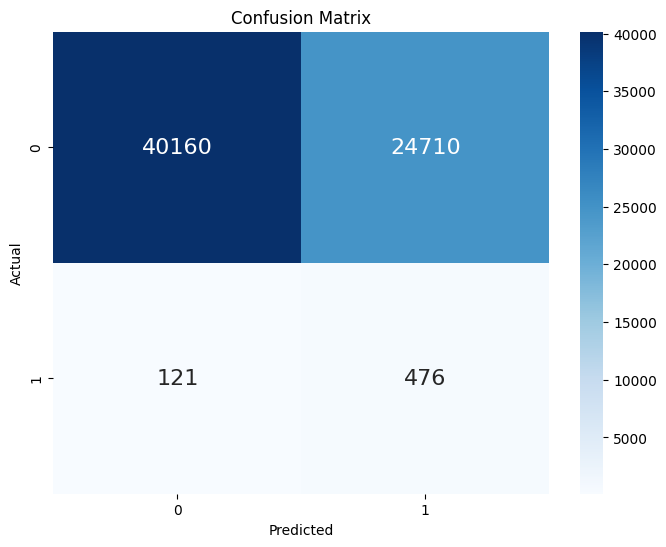

In [60]:
# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

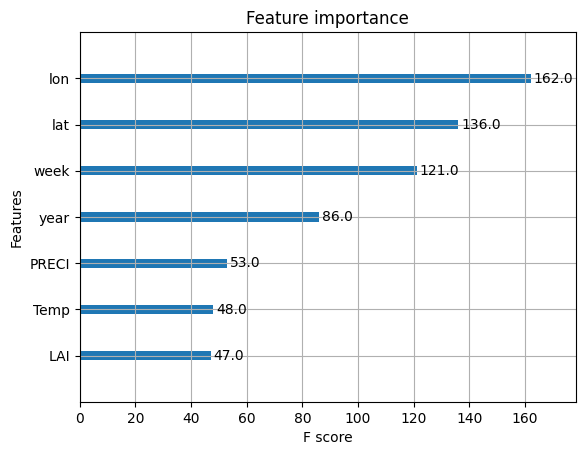

In [61]:
# Visualize feature importance
xgb.plot_importance(model)